<a href="https://colab.research.google.com/github/kutikova2016/see-me/blob/master/H1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [0]:
from IPython.display import SVG, display
from graphviz import Source

In [0]:
from IPython.display import HTML
style="<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)

In [0]:
df = pd.read_csv('train.csv')\
    #.rename(columns={'math score':'math_score', 'reading score':'reading_score', 'writing score':'writing_score'})
    #.groupby(['group']).std()
     #   .aggregate({'species': 'count'})
df.head(2)

In [0]:
X = df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)
X.fillna({'Age': X.Age.median()}, inplace=True)
X = pd.get_dummies(X)
y = df.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [0]:
clf.fit(X_train, y_train)

In [0]:
clf.score(X_train, y_train)

In [0]:
clf.score(X_test, y_test)

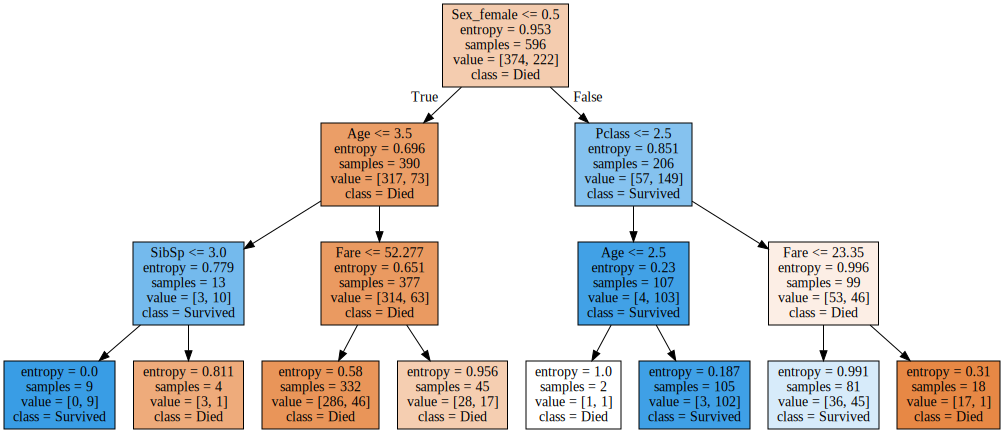

In [0]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(X),
                                    class_names = ['Died', 'Survived'],
                                    filled = True))
display(SVG(graph.pipe(format='svg')))

In [0]:
scores_data = pd.DataFrame()

In [0]:
for max_depth in range(1, 12):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score]})
    scores_data = scores_data.append(temp_score_data)

In [0]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(X),
                                    class_names = ['Died', 'Survived'],
                                    filled = True))
display(SVG(graph.pipe(format='svg')))

In [0]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'], 
                           var_name='set_type', value_name='score')
scores_data_long.head()

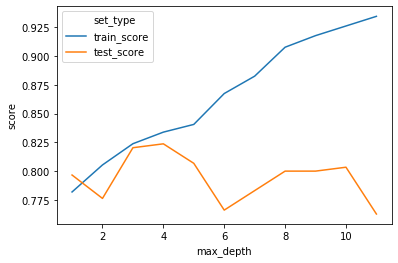

In [0]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

In [0]:
train = pd.read_csv('train_iris.csv', index_col=0)
test = pd.read_csv('test_iris.csv', index_col=0)
X_tr, y_tr = train.drop(columns=['species']), train.species
X_ts, y_ts = test.drop(columns=['species']), test.species
#X_tr = X_tr.drop(['Unnamed: 0'], axis=1)
#X_ts = X_ts.drop(['Unnamed: 0'], axis=1)

In [0]:
X_tr.head(), y_ts.head()

In [0]:
mem = pd.DataFrame()
np.random.seed(0)
for depth in range(1, 100):
    clf = tree.DecisionTreeClassifier(max_depth=depth, criterion='entropy')
    clf.fit(X_tr, y_tr)
    tr_score = clf.score(X_tr, y_tr)
    ts_score = clf.score(X_ts, y_ts)
    new_st = pd.DataFrame({'depth': [depth],
                           'tr': [tr_score],
                           'ts': [ts_score]})
    mem = mem.append(new_st)

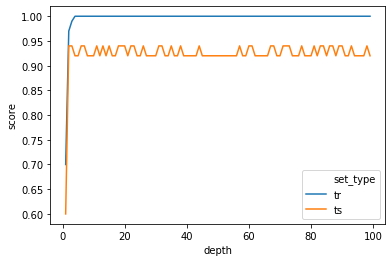

In [0]:
mem2 = pd.melt(mem, id_vars=['depth'], value_vars=['tr', 'ts'], 
                           var_name='set_type', value_name='score')
sns.lineplot(x="depth", y="score", hue="set_type", data=mem2)

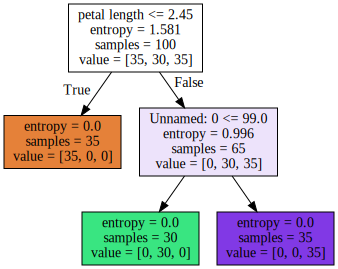

In [0]:
clf = tree.DecisionTreeClassifier(max_depth=10, criterion='entropy')
clf.fit(X_tr, y_tr)
graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(X_tr),
                                    filled = True))
display(SVG(graph.pipe(format='svg')))

In [0]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth=5, min_=5)

In [0]:
import torch
w = torch.tensor([[5., 10.], [1., 2.]], requires_grad=True)
print(w)


In [0]:
function = (torch.log(torch.log(w + 7))).prod()# put our code here
function.backward()

print(w.grad)

tensor([[0.0201, 0.0109],
        [0.0449, 0.0351]])
